In [1]:
import sys
sys.path.append("../Modules/")
sys.path.append("../pyFiles/")
sys.path.append("../")
import os

import pandas as pd
import numpy as np

# from configobj import ConfigObj
# from configobj import flatten_errors
# from validate import Validator
    
import logging

# from analysisParameters import loadParameters
# from loadDataE1 import loadSessionDict

#fmt = 'logging.Formatter(''%(levelname)s_%(name)s-%(funcName)s(): - %(message)s'
fmt = '%(levelname)s_%(name)s-%(funcName)s(): - %(message)s'
logging.basicConfig(level=logging.INFO, format=fmt)
logger = logging.getLogger(__name__)


from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import os

init_notebook_mode(connected=True)


In [2]:
# sessionDict = projectTrajectories(sessionDict)
import matplotlib.pyplot as plt
%matplotlib notebook

### Save all out automoatically

In [3]:
# import dos2unix 
# ! dos2unix ../sessionFiles.pickle

In [4]:
import pickle


file = open('../sessionFiles.pickle', 'rb')
# allSessions = pickle.load(file)
allSessions =pd.read_pickle(file)
file.close()

In [5]:
[(idx, session['subID'])  for idx, session in enumerate( allSessions)]

[(0, 'AC'),
 (1, 'AI'),
 (2, 'ASB'),
 (3, 'BDW'),
 (4, 'BL'),
 (5, 'CAF'),
 (6, 'CM'),
 (7, 'JL'),
 (8, 'LD'),
 (9, 'MFF'),
 (10, 'RGH'),
 (11, 'romp-f1d42c45-47a6-47b7-9cda-07ba32282dcc')]

In [6]:
# subData = gbSub.get_group(0)
# subData

sessionDict = allSessions[11]



In [7]:
list(sessionDict['trialInfo'].groupby(['blockNumber','trialNumber']) .groups)

[(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (2, 10),
 (2, 11),
 (2, 12),
 (2, 13),
 (2, 14),
 (2, 15),
 (3, 16),
 (3, 17),
 (3, 18),
 (3, 19),
 (3, 20),
 (3, 21),
 (3, 22),
 (3, 23),
 (3, 24),
 (3, 25),
 (3, 26),
 (3, 27),
 (3, 28),
 (3, 29),
 (3, 30),
 (3, 31),
 (3, 32),
 (3, 33),
 (3, 34),
 (3, 35),
 (3, 36),
 (3, 37),
 (3, 38),
 (3, 39),
 (3, 40),
 (3, 41),
 (3, 42),
 (3, 43),
 (3, 44),
 (3, 45),
 (3, 46),
 (3, 47),
 (3, 48),
 (3, 49),
 (3, 50),
 (3, 51),
 (3, 52),
 (3, 53),
 (3, 54),
 (3, 55),
 (3, 56),
 (3, 57),
 (3, 58),
 (3, 59),
 (3, 60),
 (3, 61),
 (3, 62),
 (3, 63),
 (3, 64),
 (3, 65),
 (3, 66),
 (3, 67),
 (3, 68),
 (3, 69),
 (3, 70),
 (3, 71),
 (3, 72),
 (3, 73),
 (3, 74),
 (3, 75),
 (3, 76),
 (3, 77),
 (3, 78),
 (3, 79),
 (3, 80),
 (3, 81),
 (3, 82),
 (3, 83),
 (3, 84),
 (3, 85),
 (3, 86),
 (3, 87),
 (3, 88),
 (3, 89),
 (3, 90),
 (3, 91),
 (3, 92),
 (3, 93),
 (3, 94),
 (3, 95),
 (3, 96),
 (3, 97),
 (3, 98),
 (3, 99),
 (3, 100),
 (3, 101

In [8]:
blNum = 2
trNumInBlock = 2

trNumAbs = list(sessionDict['trialInfo'].groupby('blockNumber').get_group(blNum)['trialNumber'])

gbData_bl_tr = sessionDict['processedExp'].groupby(['blockNumber','trialNumber']) 
gbInfo_bl_tr = sessionDict['trialInfo'].groupby(['blockNumber','trialNumber']) 

trDataGb = gbData_bl_tr.get_group( (blNum,trNumAbs[trNumInBlock]) ) 
trInfoGb = gbInfo_bl_tr.get_group( (blNum,trNumAbs[trNumInBlock]) ) 

# plotProjectedTrajectory(trDataGb,trInfoGb)

CWD:/Users/gjdpci/Documents/GitHub/Interception_UXF_Analysis/Analysis Notebooks


<IPython.core.display.Javascript object>


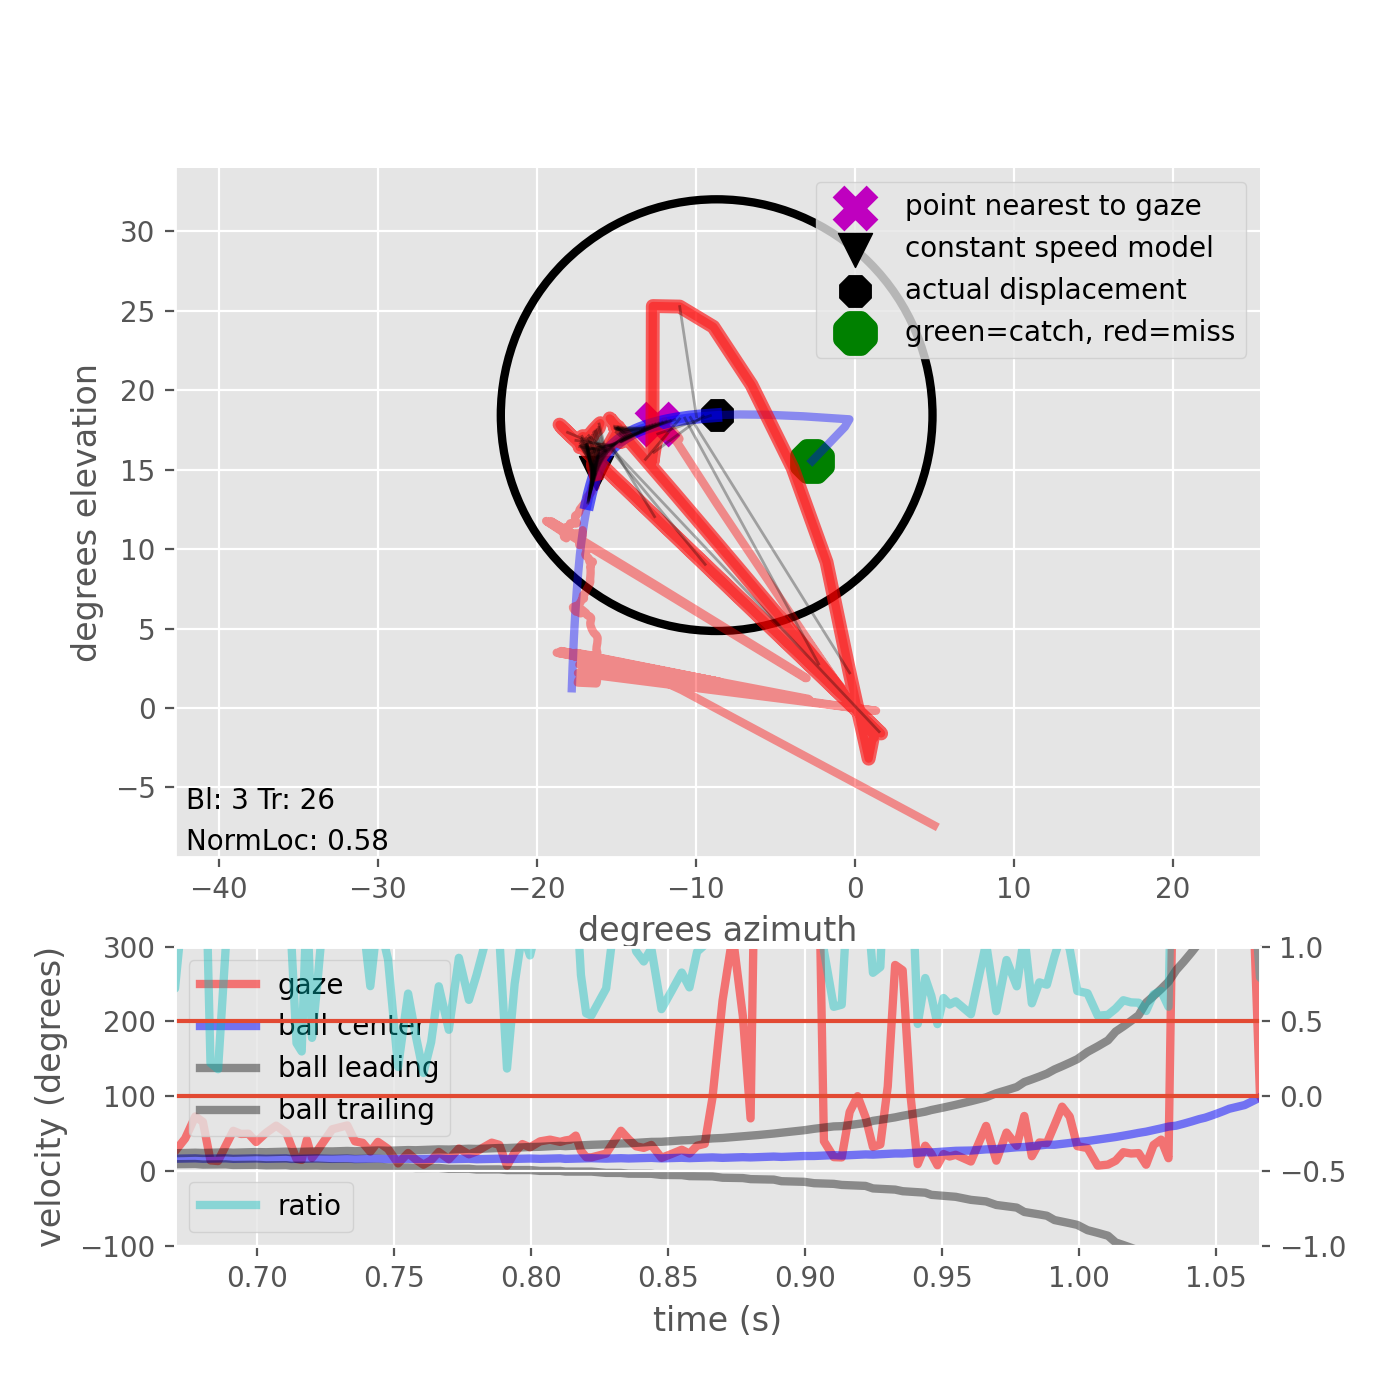

(<Figure size 700x700 with 3 Axes>,
 <AxesSubplot:xlabel='degrees azimuth', ylabel='degrees elevation'>)

In [15]:
blNum = 3
trNumInBlock = 10

trNumAbs = list(sessionDict['trialInfo'].groupby('blockNumber').get_group(blNum)['trialNumber'])

gbData_bl_tr = sessionDict['processedExp'].groupby(['blockNumber','trialNumber']) 
gbInfo_bl_tr = sessionDict['trialInfo'].groupby(['blockNumber','trialNumber']) 

trDataGb = gbData_bl_tr.get_group( (blNum,trNumAbs[trNumInBlock]) ) 
trInfoGb = gbInfo_bl_tr.get_group( (blNum,trNumAbs[trNumInBlock]) ) 

# plotProjectedTrajectory(trDataGb,trInfoGb)

import processData as pd
pd.plotMovementModel(trDataGb,trInfoGb,sessionDict['analysisParameters'],halfHFOVDegs=60)

In [24]:
# list(trDataGb)

In [23]:
startTimeS = trDataGb['pupilTimestamp'].iloc[0]
endTimeS = trDataGb['pupilTimestamp'].iloc[-2]

# I googled for, "python find first larger than"
startIndex = next(idx for idx, val in enumerate(trDataGb['pupilTimestamp']) if val >  startTimeS)
endIndex = next(idx for idx, val in enumerate(trDataGb['pupilTimestamp']) if val >  endTimeS)
print('Plotting from index: ' + str(startIndex) + ' to ' + str(endIndex))

colors_idx = ['rgb(0,204,204)','rgb(128,128,128)','rgb(204,0,0)','rgb(102,0,204)']

from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=1,shared_xaxes=True)

eih_el = go.Scattergl(
    x=trDataGb['pupilTimestamp'][startIndex:endIndex],
    y=trDataGb['cycGIW_el'][startIndex:endIndex],
    name = 'cycGIW_el',
    marker_color = colors_idx[0],
    mode='lines+markers',
    marker_size = 5,
    opacity = 0.8)

eih_az = go.Scattergl(
    x=trDataGb['pupilTimestamp'][startIndex:endIndex],
    y=trDataGb['cycGIW_az'][startIndex:endIndex],
    name = 'cycGIW_az',
    marker_color = colors_idx[1],
    mode='lines+markers',
    marker_size = 5,
    opacity = 0.8)


conf = go.Scattergl(
    x=trDataGb['pupilTimestamp'][startIndex:endIndex],
    y=trDataGb['confidence'][startIndex:endIndex],
    name = 'gazeInWorldCam_az',
    marker_color = colors_idx[1],
    mode='lines+markers',
    marker_size = 5,
    opacity = 0.8)


fig.append_trace(eih_el, row=1, col=1)
fig.append_trace(eih_az, row=1, col=1)
fig.append_trace(conf, row=2, col=1)

yLim=[-50,50]
width=800
height=800
inline=True

layout = dict(
    dragmode= 'pan',
    title='Time Series with Rangeslider',
    width=width,
    height=height,
    yaxis=dict(range=yLim, title='angular position (degrees)'),
)

fig.update_yaxes(range=[-30, 80], row=1, col=1)
fig.update_yaxes(range=[0, 1], row=2, col=1)

# fig.update_xaxes(range=[startTimeS,startTimeS+0.5], row=2, col=1)

fig.update_yaxes(title = 'por (deg)',row=1,col=1)
fig.update_yaxes(title = 'conf',row=2,col=1)
fig.update_xaxes(title = 'time (s)',row=3,col=1)

fig.update_layout(legend_orientation="h", 
             xaxis2_rangeslider_visible=True, xaxis2_rangeslider_thickness=0.1,
                  xaxis2_rangeslider_range=[startTimeS,startTimeS+0.5])

fig.update_layout(height=height, width=width, title_text="Stacked Subplots")

iplot(fig)


Plotting from index: 1 to 661


In [ ]:

# vel = go.Scattergl(
#     x=trDataGb['pupilTimestamp'][startIndex:endIndex],
#     y=trDataGb['velInWorldCam'][startIndex:endIndex],
#     name = 'velInWorldCam_az',
#     marker_color = colors_idx[0],
#     mode='lines+markers',
#     marker_size = 5,
#     opacity = 0.8)


# ###

# bEih_el = go.Scattergl(
#     x=trDataGb['pupilTimestamp'][startIndex:endIndex],
#     y=trDataGb['ball_el'][startIndex:endIndex],
#     name = 'ball_el',
#     marker_color = colors_idx[2],
#     mode='lines+markers',
#     marker_size = 5,
#     opacity = 0.8)

# bEih_az = go.Scattergl(
#     x=trDataGb['pupilTimestamp'][startIndex:endIndex],
#     y=trDataGb['ball_az'][startIndex:endIndex],
#     name = 'ball_az',
#     marker_color = colors_idx[3],
#     mode='lines+markers',
#     marker_size = 5,
#     opacity = 0.8)


# bVel = go.Scattergl(
#     x=trDataGb['pupilTimestamp'][startIndex:endIndex],
#     y=trDataGb['ballVelInWorldCam'][startIndex:endIndex],
#     name = 'ballVel',
#     marker_color = colors_idx[1],
#     mode='lines+markers',
#     marker_size = 5,
#     opacity = 0.8)


####


# fig.append_trace(eih_el, row=1, col=1)
# fig.append_trace(eih_az, row=1, col=1)
# fig.append_trace(vel, row=2, col=1)

# fig.append_trace(bEih_el, row=1, col=1)
# fig.append_trace(bEih_az, row=1, col=1)
# fig.append_trace(bVel, row=2, col=1)



